In [27]:
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.linear_model import LinearRegression, LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Logistic Regression

Logistic regression is a popular statistical model used for binary classification problems. It aims to estimate the probability that an instance belongs to a particular class. The model assumes a linear relationship between the predictors and the log-odds of the event occurring. In this response, I'll explain the geometrical intuition behind logistic regression and provide the necessary formulas.

- **Assumption:** Classes are almost perfectly linerarly separable.

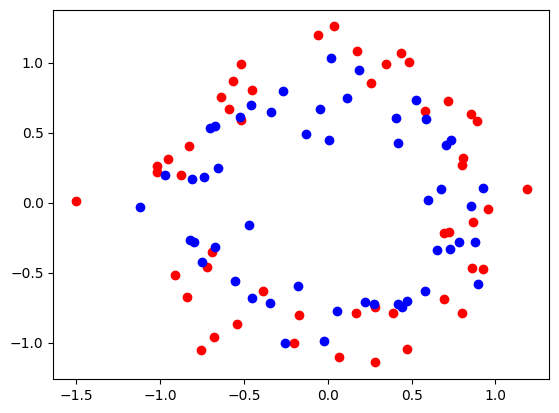

In [14]:
X,y = make_circles(n_samples=100, noise=0.15, random_state=66)

plt.scatter(X[y==0, 0], X[y==0, 1], c ='r')
plt.scatter(X[y==1, 0], X[y==1, 1], c ='b')
plt.show()

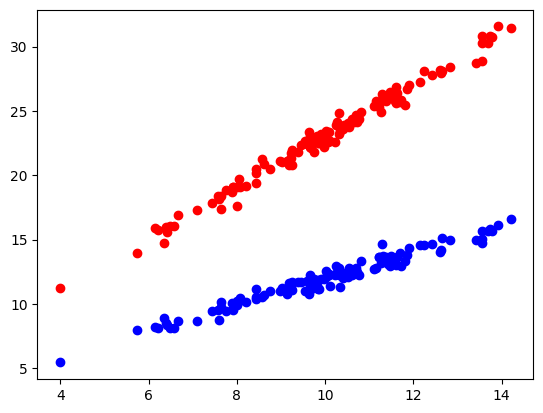

In [15]:
X = np.random.normal(10, 2, 120)
y = 2 * X + np.random.normal(3, 0.5, 120)
y2 = X + np.random.normal(2, 0.5, 120)

plt.scatter(X, y, c ='r')
plt.scatter(X, y2, c ='b')
plt.show()

In the previous unit, you learned about one of the supervised learning tasks called regression where the goal was to predict a continuous real value. In this unit, you will learn about another type of supervised learning task called classification. 

In classification, we predict a **discrete** value or label as opposed to the continuous value predicted by linear regression . **A particular discrete value or label represents a particular class**. Therefore, we are actually predicting which class a sample belongs to based on its features. For example, predicting if a person has a disease or not. Here, having the disease can be represented using a discrete value 1 and not having the disease can be represented using another discrete value of 0. Similarly, here are some other simple examples of the classification problem 
- predicting if an image is of a cat (0) or a dog (1), 
- predicting if a car will get sold (1) or not (0), 
- classifying an email as spam (1) or not (0)
  
There are many machine learning algorithms that can be used to solve a classification problem. Logistic regression is one of them and like many others, you will also start your journey of solving classification problems via logistic regression.  

### Code

In [46]:
# Synthetic Dataset

X,y = make_classification(
    n_samples=50, n_features=1, n_classes=2, n_informative=1, scale = 10,
    n_repeated=0, n_redundant=0, class_sep=1,n_clusters_per_class=1,shift=80,
    random_state=44, 
)

df = pd.concat(
    [(np.ceil(pd.DataFrame(X))).astype(int),pd.DataFrame(y)],
    axis=1
)
df.columns = ["SAT_score", "Admission"]
df.head()    

,SAT_score,Admission
0,811,1
1,793,0
2,787,0
3,785,0
4,816,1


<Axes: xlabel='SAT_score', ylabel='Admission'>

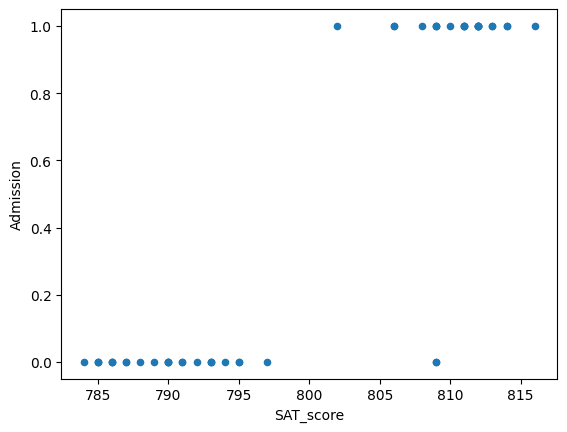

In [54]:
# Plotting to check linearity
df.plot.scatter('SAT_score', 'Admission')

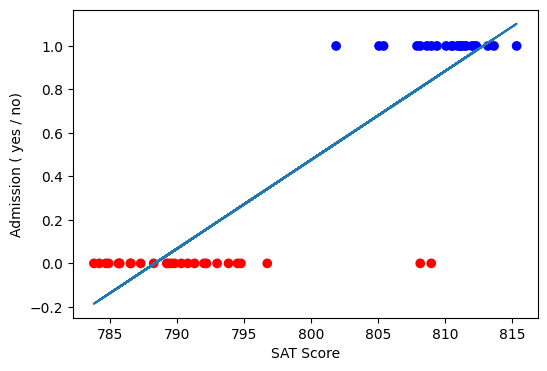

In [56]:
map_color = np.array(['r','b'])
# Let's try with Linear Regression
linearReg = LinearRegression()
linearReg.fit(X,y)

plt.figure(figsize=(6,4))
plt.scatter(X,y, c = map_color[y])
plt.plot(X,linearReg.predict(X))
plt.xlabel('SAT Score')
plt.ylabel('Admission ( yes / no)')

plt.show()

We can clearly see that the regression line above is not a good fit for our dataset. Can you explain why? A good fit regression line must pass through most of the data points. Also, linear regression predicts a continuous value but all we want is either 0 or 1 or numbers between 0 and 1 (we will come to this later). Thus, linear regression performs poorly when used for classification tasks. 

We will now discuss if any modifications to linear regression (hint: we need to squash all the predicted values between 0 and 1) can help us solve the classification task.

**In logistic regression, we pass the output of the linear regression $\hat{y}$ to a function known as the sigmoid function**. The sigmoid function is of the following form:

$$\sigma(z) = \frac 1 {(1+ e^{-z})} $$

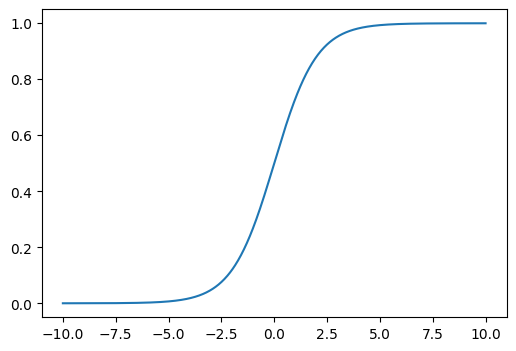

In [51]:
# Sigmoid Function
z = np.linspace(-10,10,1000)
sigma = lambda x: 1 / (1+np.exp(-x))

plt.figure(figsize=(6,4))
plt.plot(z, sigma(z))

plt.show()

The function $\sigma(z)$, shown above, maps any real number to the [0, 1] interval, making it useful for classification. This function $\sigma(z)$ is sometimes also called the logistic sigmoid function or logistic curve.
 

As mentioned above, $\hat{y}$ is the input to this sigmoid function $\sigma(z)$, which means that $z=\beta_0 + \beta_1 x$. Let the output of the logistic regression for a sample $x$ be $p(x)$. Then $$p(x) = \sigma(z) = \frac 1 {1 + e^{-z}} = \frac 1 {1 + e^{-(\beta_0 + \beta_1x)}}$$ 

**The output of logistic regression, $p(x)$ gives us the probability of a sample belonging to class 1, and $1-p(x)$ gives us the probability of it belonging to class 0.**

From the above equations, we can see that we need to estimate the regression coefficients $\beta_0$, $\beta_1$. The discussion of the optimization method used to compute the coefficients is beyond the scope of this chapter. For now, we simply rely on Scikit-Learn's [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) object to compute the values for us.

In [57]:
# Logistic Regression
logisReg = LogisticRegression()
logisReg.fit(X,y)

LogisticRegression()

In [70]:
logisReg.predict_proba([[810]])

array([[0.0579573, 0.9420427]])

In [69]:
logisReg.predict([[780]])

array([0])

### Decision Boundary

In [86]:
# Synthetic Dataset

X,y = make_classification(
    n_samples=50, n_features=2, n_classes=2, n_informative=2, scale = [10,3],
    n_repeated=0, n_redundant=0, class_sep=1,n_clusters_per_class=1,shift=[80,2.6],
    random_state=44,
)

df = pd.DataFrame(X, columns = ['SAT_score','CGPA'])
data = pd.concat(
    [df ,pd.DataFrame(y, columns=['Admission'])],
    axis=1
)
data.SAT_score = np.ceil(data.SAT_score).astype(int)
data.CGPA = np.around(df.CGPA,1)
data.head()

,SAT_score,CGPA,Admission
0,812,9.2,0
1,806,5.8,1
2,815,7.4,0
3,813,3.2,1
4,820,6.0,1


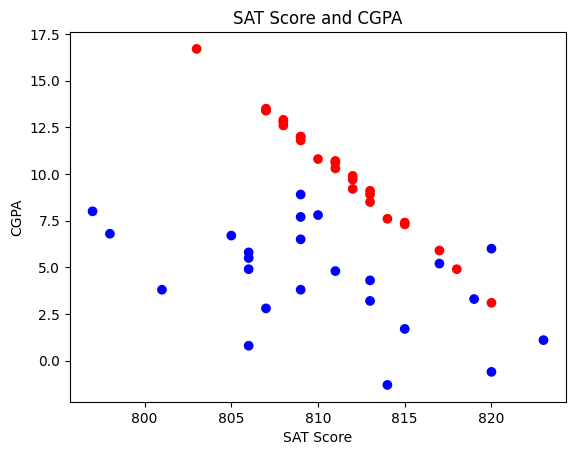

In [88]:
map_color = np.array(['r','b'])

plt.scatter(data.SAT_score, data.CGPA, c= map_color[data.Admission.values])
plt.title('SAT Score and CGPA')
plt.xlabel('SAT Score')
plt.ylabel('CGPA')
plt.show()

In [89]:
X = data.loc[:,['SAT_score','CGPA']].to_numpy()
y = data.Admission.to_numpy()

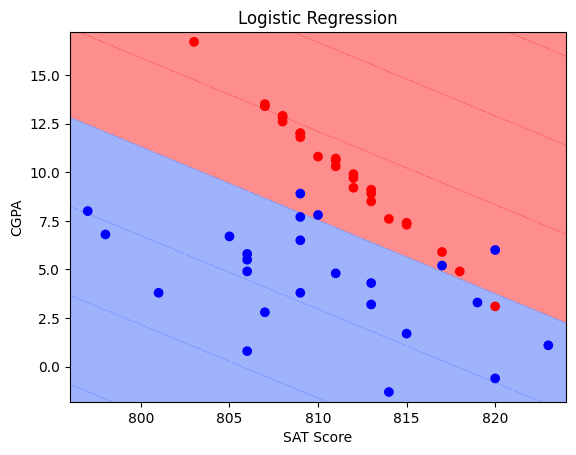

In [93]:
# Decision Boundary
logistic_regression = LinearRegression()
logistic_regression.fit(X,y)

# Creating a meshgrid of SAT score and CGPA
X1_min = X[:, 0].min()
X1_max = X[:, 0].max()

X2_min = X[:, 1].min()
X2_max = X[:, 1].max()

X1_mesh, X2_mesh = np.meshgrid(np.arange(X1_min - 1, X1_max +1, 0.01), np.arange(X2_min - 1, X2_max + 1, 0.01))

# Classifying each point in meshgrid
input_mesh = np.array([X1_mesh.ravel(), X2_mesh.ravel()]).T # all points in meshgrid as input
label_mesh = logistic_regression.predict(input_mesh) # labels for all points in meshgrid

# Plotting the decision boundary for entire mesh
from matplotlib.colors import ListedColormap
plt.contourf(X1_mesh, X2_mesh, label_mesh.reshape(X1_mesh.shape),  alpha = 0.75, cmap = ListedColormap(('#FE6969', '#7F9AFD')))


# Plotting the data points
plt.scatter(X[:,0], X[:,1], c=y, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1_min - 1, X1_max + 1)
plt.ylim(X2_min - 0.5, X2_max + 0.5)

# Titles and labels
plt.title('Logistic Regression')
plt.xlabel('SAT Score')
plt.ylabel('CGPA')
plt.show()